# Exploratory Data Analysis


### **Data information**

Lead Is either **Female** or **Male**.

The lead is assumed to be the person who speaks most in the film (says the most words). 

The co-lead is assumed to have the gender male (if lead is female) and female (if lead is male).

The following input variables are provided

- **Year** That the film was released.

- **Number of female actors** With major speaking roles.
- **Number of male actors** With major speaking roles.
- **Gross Profits** made by film.
- **Total words** Total number of words spoken in the film.
- **Number of words male** Number of words spoken by all other male actors in the film (excluding lead if lead is male)
- **Number of words female** Number of words spoken by all other female actors in the film (excluding
lead if lead is female)
- **Number of words lead** Number of words spoken by lead.
- **Difference in words lead and co-lead** Difference in number of words by lead and the actor of
opposite gender who speaks most.
- **Lead Age** Age of lead actor.
- **Co-lead Age** Age of co-lead actor.
- **Mean Age Male** Mean age of all male characters.
- **Mean Age Female** Mean age of all female characters.

In [2]:
import pandas as pd

data = pd.read_csv("data/train.csv")

# Summary about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [3]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


### **Do men or women dominate speaking roles in Hollywood movies?**

The first question to ask ourselves is what it means to "dominate" speaking roles, and what data captures such information.

Natural variables that captures such information are possibly the **number of male/female actors** with major speaking roles in the movie, **the number of words** spoken in the movie for each gender (including lead), as well as the gender of the **lead**. 

For a gender to dominate speaking roles, with these variables in mind, would then mean that the aggregate and average count values of these variables is in general higher compared to the other gender, and that the difference is statistically significant.

To investigate this, we generate bar plots to compare aggregate values, box plots to visualize average behaviour and spread, and perform Welch's t-tests for the difference of means between the genders.



##### *Number of words spoken*

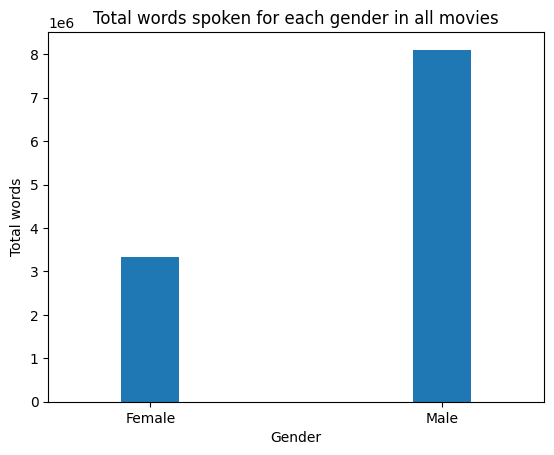

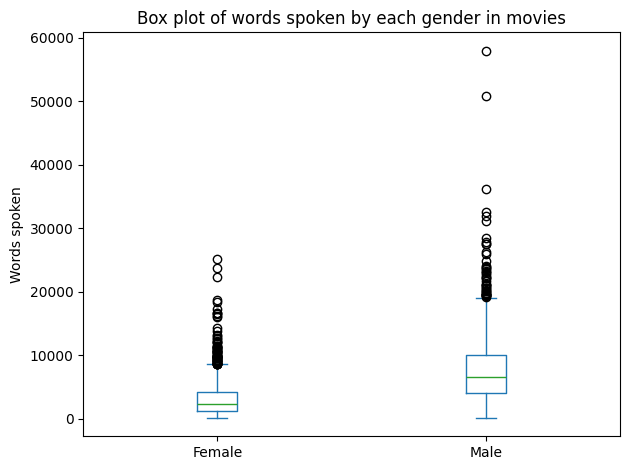

In [4]:
import matplotlib.pyplot as plt

number_words = data.loc[:, ["Number words female", "Number words male"]]
number_words.index

# Add words by lead actor
number_words.loc[data["Lead"] == "Female", "Number words female"] += data["Number of words lead"]
number_words.loc[data["Lead"] == "Male", "Number words male"] += data["Number of words lead"]


# Plot total words spoken in all movies, and bar plot of total words spoken in each movie
total_words = number_words.sum()
total_words.index = ["Female", "Male"]
total_words.plot.bar(title="Total words spoken for each gender in all movies",
                            xlabel="Gender",
                            ylabel="Total words",
                            rot = 0,
                            width = 0.2)

ax2 = number_words.plot.box(title="Box plot of words spoken by each gender in movies",
                            ylabel="Words spoken")
ax2.set_xticklabels(labels=["Female", "Male"])
plt.tight_layout()
plt.show()


We see that throughout the history of the movies in the dataset, men have had the major share of total words spoken. Further, the box plot shows that on average total words spoken by men is higher than for female actors in movies, with more variation and several outliers with extreme values of words spoken.

We perform a one-tailed Welch's t-test to see if the difference is statistically significant, with the null hypothesis that the difference between the mean of words spoken by female and male is 0, and the alternative hypothesis that it is greater than 0.

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(number_words["Number words female"], 
          number_words["Number words male"], 
          equal_var = False,
          alternative="less"
          )

TtestResult(statistic=-23.044868655595028, pvalue=4.772537231539818e-102, df=1604.843148936752)

We see that the p-value is essentially 0 and thus the null hypothesis is rejected, telling us that men on average speak more in movies. However, this t-test assumes independence of the samples, which is questionable in this case.

#### *Number of actors for each gender*

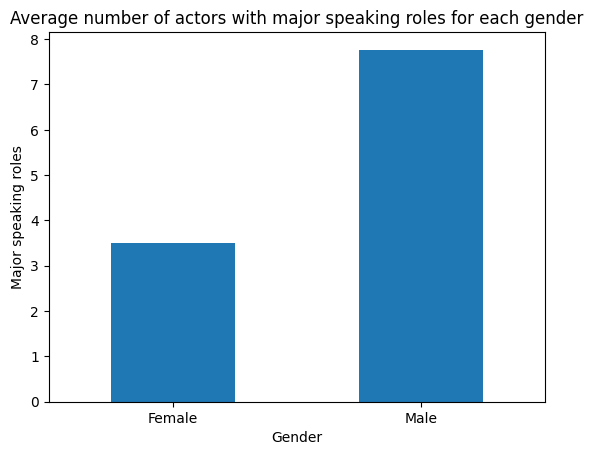

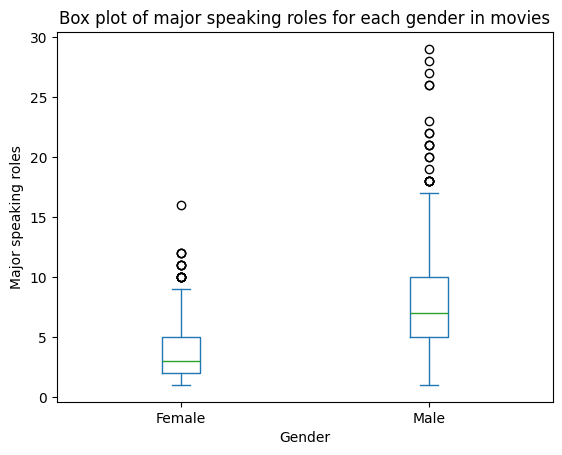

In [20]:
number_actors = data.loc[:, ["Number of female actors", "Number of male actors"]]
number_actors.head()

ax1 = number_actors.mean().plot.bar(title="Average number of actors with major speaking roles for each gender",
                              xlabel="Gender",
                              ylabel="Major speaking roles",
                              rot=0)
ax1.set_xticklabels(["Female", "Male"])
ax2 = number_actors.plot.box(title="Box plot of major speaking roles for each gender in movies",
                       ylabel="Major speaking roles",
                       xlabel="Gender")
ax2.set_xticklabels(["Female", "Male"])
plt.show()

Once again the plots indicate that men are dominant in number of major speaking roles in the movie industry.

#### *Number of lead actors for each gender*


In [ ]:
lead_actors_count = data.loc[:, ["Lead"]].value_counts()


Lead  
Male      785
Female    254
Name: count, dtype: int64

We have a class imbalance in the lead actor variable, where males are dominant once again.

In conclusion, males have dominated speaking roles in the movie industry compared to females in this dataset.

### **Has gender balance in speaking roles changed over time (i.e. years)?**



We decide to measure the balance of speaking roles as the fraction of average values for male and female for each variable we previously considered. We calculate the fraction as $\frac{mean_{female}}{mean_{male}}$ for each year, or $\frac{count_{female}}{count_{male}}$ in the case of number of lead actor roles.

In [ ]:
# Collect variables of interest in new dataframe
variable_values = data.loc[:, 
                           ["Number of female actors", 
                            "Number of male actors", 
                            "Number words female", 
                            "Number words male",
                            "Lead",
                            "Year"]]

# Include spoken words by lead in spoken words for each gender
variable_values.loc[data["Lead"] == "Female","Number words female"] += data["Number of words lead"]
variable_values.loc[data["Lead"] == "Male","Number words male"] += data["Number of words lead"]

# Group by year
grouped_by_year = variable_values.groupby("Year")







### **Do films in which men do more speaking make a lot more money than films in which women speak more?**

### **Correlations and relationships between features**

